In [417]:
import numpy as np

class LinearRegression:
    def __init__(self, b: float = 0.0):
        self.weights = None
        self.bias = b
    
    def predict(self, x_predict: np.array) -> np.array:
        return np.dot(x_predict, self.weights) + self.bias
    
    @staticmethod
    def compute_gradients_of_weights(errors: np.array, x: np.array) -> np.array:
        return np.dot(x.T, errors) / x.shape[0]

    @staticmethod
    def compute_bias_gradient(errors: np.array) -> float:
        return np.mean(errors)

    def fit(self, x_train: np.array, y_train: np.array, learning_rate: float = 0.01, epochs: int = 100):
        n_samples, n_features = x_train.shape
        self.weights = np.zeros(n_features)
        for _ in range(epochs):
            y_predict = self.predict(x_train)
            errors = y_train - y_predict

            # apply gradient descent
            weights_gradients = self.compute_gradients_of_weights(errors, x_train)
            bias_gradient = self.compute_bias_gradient(errors)
            
            self.weights += learning_rate * weights_gradients
            self.bias += learning_rate * bias_gradient

In [418]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.random.rand(1000, 2) * 10

x1, x2 = X[:, 0], X[:, 1]
y = 2 * x1 + 3 * x2 + 1 + np.random.randn(1000) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

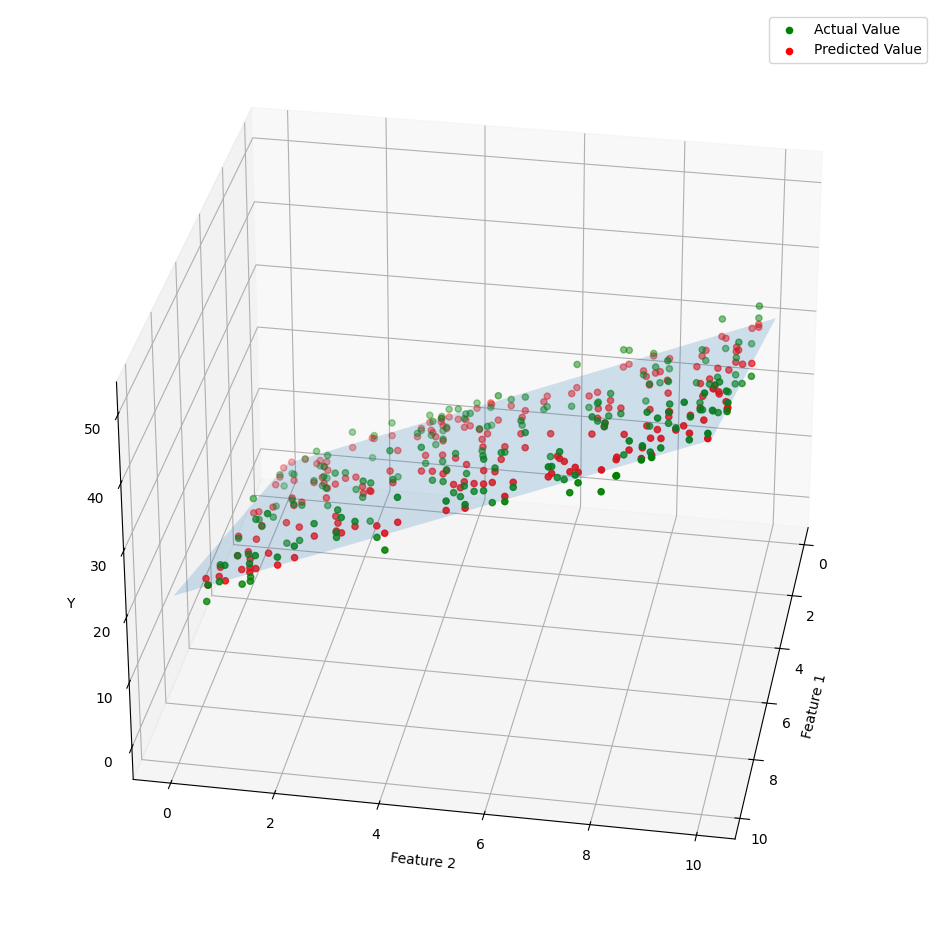

In [419]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.view_init(elev=30, azim=10)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y')

feature1_values = X_test[:, 0]
feature2_values = X_test[:, 1]

ax.scatter(feature1_values, feature2_values, y_test, c="green", label="Actual Value")
ax.scatter(feature1_values, feature2_values, y_pred, c="red", label="Predicted Value")

x1_range = np.linspace(feature1_values.min(), feature1_values.max(), 100)
x2_range = np.linspace(feature2_values.min(), feature2_values.max(), 100)
xx, yy = np.meshgrid(x1_range, x2_range)

grid_points = np.column_stack([xx.ravel(), yy.ravel()])
zz = model.predict(grid_points).reshape(xx.shape)

ax.plot_surface(xx, yy, zz, alpha=0.2)

plt.legend()
plt.show()

In [420]:
mse = np.mean((y_pred - y_test) ** 2)
print(f"MSE: {mse}")

MSE: 3.904326574725099
